#**LetsGrowMore #November 2021**

#**Author - Parth Kantilal Rathod**

#**Level : Beginner.**

#**Task Title : Stock Market Prediction And Forecasting Using Stacked LSTM**

**STEPS**

- **Step 1** - Import Libraries
- **Step 2** - Splitting dataset into train and test split
- **Step 3** - Convert an array of values into a dataset matrix
- **Step 4** - Reshaping the input & creating Stacked LSTM model
- **Step 5** - Model Fitting
- **Step 6** - Prediction and performance metrics
- **Step 7** - Calculate RMSE performance metrics
- **Step 8** - Test Data RMSE
- **Step 9** - Plots

**1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
# Importing the Dataset from CSV file
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df1=data.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

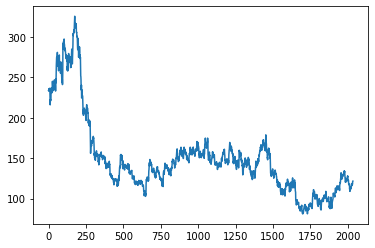

In [6]:
plt.plot(df1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

**2. Splitting dataset into train and test split**

In [8]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size

train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

**3. Convert an array of values into a dataset matrix**

In [9]:
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100

X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [11]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

**4. Reshaping the input & creating Stacked LSTM model**

In [12]:
# Reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create the Stacked LSTM model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [13]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**5. Model Fitting**

In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 13s 317ms/step - loss: 0.0210 - val_loss: 0.0052
Epoch 2/100
20/20 [==============================] - 4s 221ms/step - loss: 0.0028 - val_loss: 7.8197e-04
Epoch 3/100
20/20 [==============================] - 4s 208ms/step - loss: 0.0016 - val_loss: 9.1470e-04
Epoch 4/100
20/20 [==============================] - 4s 206ms/step - loss: 0.0015 - val_loss: 8.8811e-04
Epoch 5/100
20/20 [==============================] - 4s 209ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 5s 242ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/100
20/20 [==============================] - 5s 238ms/step - loss: 0.0013 - val_loss: 8.1219e-04
Epoch 8/100
20/20 [==============================] - 5s 247ms/step - loss: 0.0017 - val_loss: 9.8314e-04
Epoch 9/100
20/20 [==============================] - 5s 243ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 10/100
20/20 [==============================] - 5s 241ms/step - 

In [17]:
import tensorflow as tf

**6.  Prediction and performance metrics**

In [18]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


*    **Transform back to original form**





In [19]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

**7. Calculate RMSE performance metrics**

In [20]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.51569762584148

**8. Test Data RMSE**

In [21]:
math.sqrt(mean_squared_error(ytest,test_predict))

114.81418282889065

**9. Plots**



*  **Shifting train predictions for plotting**



In [22]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict



*  **Shifting test predictions for plotting**



In [23]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

*  **Plot baseline and predictions**





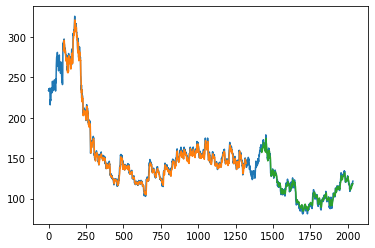

In [24]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
len(test_data)

713

In [26]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [28]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


[0.16105136]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

9 day output [[0.15020631]]
10 day input [0.11846405 0.14644608 0.14808007 0.15910948 0.15992647 0.15788399
 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908 0.18974673
 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458
 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444
 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268
 0.21568627 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817
 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013
 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458
 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072
 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288
 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327

18 day output [[0.14260969]]
19 day input [0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353
 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405
 0.1621732  0.16319444 0.16584967 0.16105136 0.16161348 0.16045506
 0.15874305 0.1569952

27 day output [[0.13874225]]
28 day input [0.17851307 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444
 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268
 0.21568627 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817
 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013
 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458
 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072
 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288
 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967
 0.16105136 0.16161348 0.16045506 0.15874305 0.15699524 0.15537438
 0.15390608 0.15257278 0.15134752 0.15020631 0.14913253 0.1481168
 0.1471561  0.1462512 

In [29]:
day_new=np.arange(1,164)
day_pred=np.arange(144,174)

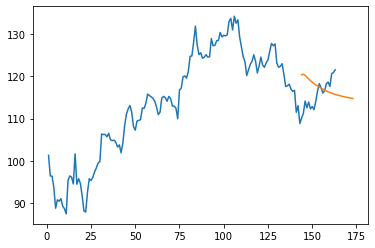

In [30]:
plt.plot(day_new,scaler.inverse_transform(df1[1872:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

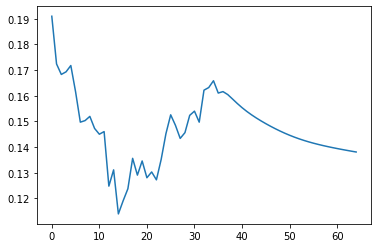

In [31]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

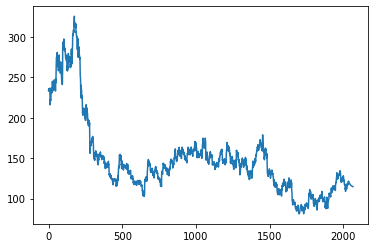

In [32]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)